In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from pathlib import Path
from keras.preprocessing import image

In [2]:
parasitized_path = Path('C:/Users/ROG/malaria - Copy/cell_images/cell_images') / 'Parasitized'
not_parasitized_path = Path('C:/Users/ROG/malaria - Copy/cell_images/cell_images') / 'Uninfected'
parasitized_path.is_dir()
not_parasitized_path.is_dir()


True

True

In [3]:
images = []
labels = []

In [4]:
from skimage import transform
new_shape = (50, 50, 3)

In [5]:
from keras.preprocessing import image
import keras.utils as image
import warnings;
warnings.filterwarnings('ignore');


for img in not_parasitized_path.glob("*.png"):
    

    img = image.load_img(img)

    
    image_array = image.img_to_array(img)
    
    
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
    
    image_array /= 255

   
    images.append(image_array)

    
    labels.append(0)

Text(0.5, 1.0, 'Sample Uninfected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images / Labels we have imported thus far:'

13779

13779

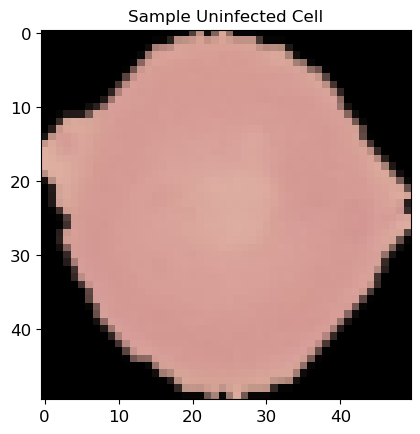

In [6]:
plt.imshow(images[0])
plt.title('Sample Uninfected Cell')
"Dimensions of image:"
images[0].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

In [7]:

for img in parasitized_path.glob("*.png"):
    
 
    img = image.load_img(img)

    
    image_array = image.img_to_array(img)
    
    
    image_array = transform.resize(image_array, new_shape, anti_aliasing=True)
    
   
    image_array /= 255

    
    images.append(image_array)

   
    labels.append(1)

Text(0.5, 1.0, 'Sample Infected Cell')

'Dimensions of image:'

(50, 50, 3)

'Images / Labels we have imported thus far:'

27558

27558

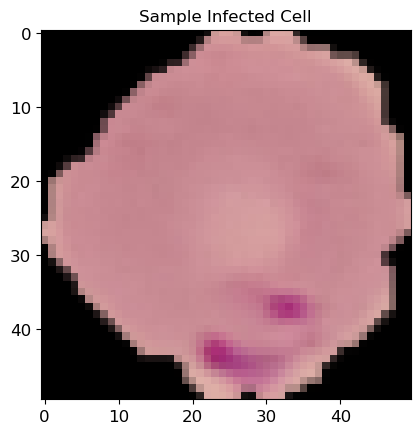

In [8]:
plt.imshow(images[-1])
plt.title('Sample Infected Cell')
"Dimensions of image:"
images[-1].shape

"Images / Labels we have imported thus far:"
len(images)
len(labels)

In [9]:
import gc
gc.collect()

5612

In [10]:
from sklearn.utils import shuffle
images, labels = shuffle(images, labels)

'1 means it is infected:'

1

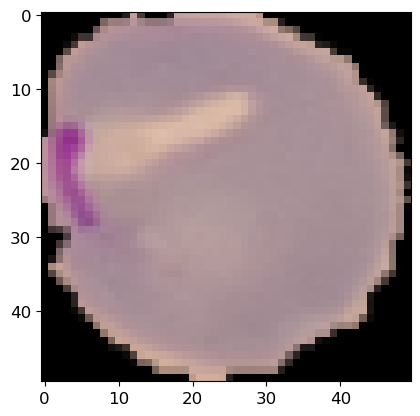

In [11]:
plt.imshow(images[-6])
"1 means it is infected:"
labels[-6]

In [12]:
x_data = np.array(images)
y_data = np.array(labels)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 0)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
f'X_train shape: {X_train.shape}'
f'X_test.shape: {X_test.shape}'

'X_train shape: (22046, 50, 50, 3)'

'X_test.shape: (5512, 50, 50, 3)'

In [16]:
y_train[0:3]

array([0, 0, 0])

In [17]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [18]:
y_train[0:3]

array([[1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [19]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [20]:
mymodel = Sequential()
mymodel.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(50, 50, 3)))
mymodel.add(MaxPooling2D(pool_size=(2,2)))
mymodel.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2,2)))
mymodel.add(Flatten())
mymodel.add(Dense(128, activation='relu'))
mymodel.add(Dropout(0.5))
mymodel.add(Dense(2, activation='sigmoid'))

In [21]:
mymodel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer= 'adam',
              metrics=['accuracy'])

In [22]:
hist = mymodel.fit(X_train, y_train,
          batch_size=120,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/20
184/184 [==============================] - 55s 297ms/step - loss: 0.6115 - accuracy: 0.6709 - val_loss: 0.5410 - val_accuracy: 0.7104
Epoch 2/20
184/184 [==============================] - 54s 292ms/step - loss: 0.3788 - accuracy: 0.8440 - val_loss: 0.2218 - val_accuracy: 0.9071
Epoch 3/20
184/184 [==============================] - 53s 288ms/step - loss: 0.2441 - accuracy: 0.9048 - val_loss: 0.1781 - val_accuracy: 0.9247
Epoch 4/20
184/184 [==============================] - 53s 286ms/step - loss: 0.1888 - accuracy: 0.9264 - val_loss: 0.1560 - val_accuracy: 0.9321
Epoch 5/20
184/184 [==============================] - 51s 280ms/step - loss: 0.1624 - accuracy: 0.9442 - val_loss: 0.1457 - val_accuracy: 0.9450
Epoch 6/20
184/184 [==============================] - 52s 282ms/step - loss: 0.1545 - accuracy: 0.9477 - val_loss: 0.1413 - val_accuracy: 0.9539
Epoch 7/20
184/184 [==============================] - 52s 284ms/step - loss: 0.1403 - accuracy: 0.9537 - val_loss: 0.1392 - val_ac

In [23]:
score = mymodel.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2029540240764618
Test accuracy: 0.9541001319885254


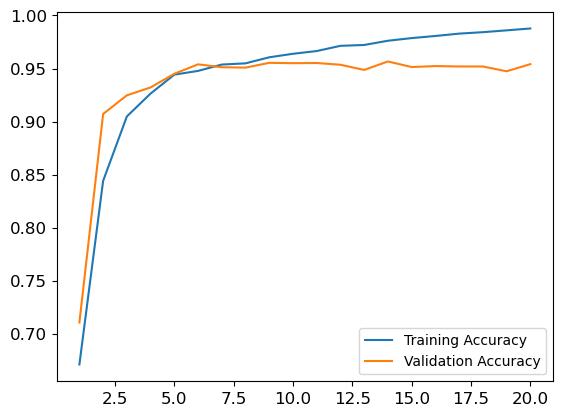

In [24]:
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [25]:
mymodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 11, 11, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3872)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [26]:
mymodel.save('model_malaria.h5')

In [27]:
from keras.models import load_model
mymodel = load_model('model_malaria.h5')

In [28]:
y_pred_mymodel = mymodel.predict(X_test)

173/173 [==============================] - 3s 17ms/step


In [29]:
y_pred_mymodel = np.argmax(y_pred_mymodel, axis=1)
y_test = np.argmax(y_test, axis=1)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

'ACCURACY SCORE:'
accuracy_score(y_test, y_pred_mymodel)

'CLASSIFICATION REPORT:' 
print(classification_report(y_test, y_pred_mymodel))

'ACCURACY SCORE:'

0.954100145137881

'CLASSIFICATION REPORT:'

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      2762
           1       0.97      0.94      0.95      2750

    accuracy                           0.95      5512
   macro avg       0.95      0.95      0.95      5512
weighted avg       0.95      0.95      0.95      5512



'CONFUSION MATRIX:'

'TRUE POSITIVES | FALSE NEGATIVES'

'FALSE POSITIVES | TRUE NEGATIVES'

(2585, 165)

(88, 2585)

<AxesSubplot:>

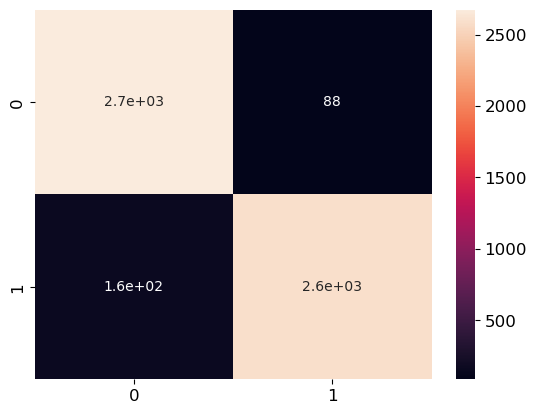

In [31]:
'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_mymodel).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tp

import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred_mymodel)
sns.heatmap(conf, annot=True)

In [32]:
##comparing accuracy metrics of my model vs VGG16

In [33]:
from keras.applications import vgg16

In [34]:
base_model = vgg16.VGG16(weights='imagenet', include_top=False, input_shape=(50, 50, 3))

In [35]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [36]:
x = base_model.output 
x = Flatten()(x)
x = Dense(120, activation='relu')(x) 
x = Dropout(0.5)(x)
predictions = Dense(2, activation='sigmoid')(x) 

In [37]:
from keras.models import Model
transfer_model = Model(inputs=base_model.input, outputs=predictions)

In [38]:
transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 50, 50, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 50, 50, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 25, 25, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 25, 25, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 25, 25, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [39]:
for layer in base_model.layers:
    layer.trainable = False

In [40]:
transfer_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
y_test = to_categorical(y_test, 2)
y_test[0:3]

array([[0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [42]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [43]:
history = transfer_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=120,
    validation_data=(X_test,y_test),
    callbacks=[early_stop]
)

Epoch 1/20
184/184 [==============================] - 494s 3s/step - loss: 0.4239 - accuracy: 0.8090 - val_loss: 0.3011 - val_accuracy: 0.8754
Epoch 2/20
184/184 [==============================] - 492s 3s/step - loss: 0.3029 - accuracy: 0.8755 - val_loss: 0.2659 - val_accuracy: 0.8986
Epoch 3/20
184/184 [==============================] - 491s 3s/step - loss: 0.2749 - accuracy: 0.8867 - val_loss: 0.2427 - val_accuracy: 0.9033
Epoch 4/20
184/184 [==============================] - 507s 3s/step - loss: 0.2596 - accuracy: 0.8924 - val_loss: 0.2388 - val_accuracy: 0.8966
Epoch 5/20
184/184 [==============================] - 510s 3s/step - loss: 0.2479 - accuracy: 0.9001 - val_loss: 0.2273 - val_accuracy: 0.9082
Epoch 6/20
184/184 [==============================] - 514s 3s/step - loss: 0.2404 - accuracy: 0.9032 - val_loss: 0.2271 - val_accuracy: 0.9044
Epoch 7/20
184/184 [==============================] - 512s 3s/step - loss: 0.2367 - accuracy: 0.9029 - val_loss: 0.2180 - val_accuracy: 0.9086

KeyboardInterrupt: 

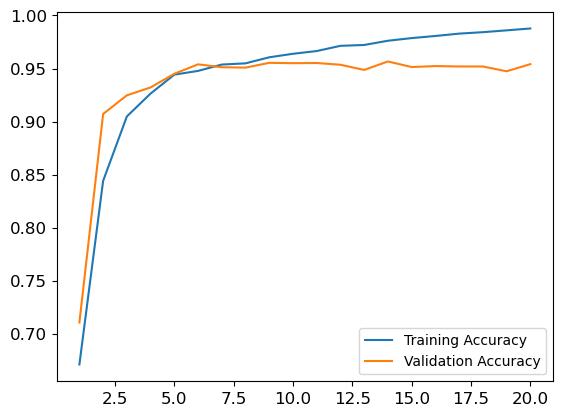

In [47]:
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))  # values for x axis [1, 2, ..., # of epochs]
plt.plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
plt.legend(('Training Accuracy', 'Validation Accuracy'))
plt.show()

In [48]:
transfer_model.save('model_malaria_transfer.h5')

In [49]:
from keras.models import load_model
transfer_model = load_model('model_malaria_transfer.h5')

In [50]:
y_pred_transfer = transfer_model.predict(X_test)

173/173 [==============================] - 136s 787ms/step


In [51]:
y_pred_transfer = np.argmax(y_pred_transfer, axis=1)
y_test = np.argmax(y_test, axis=1)

In [52]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix


'ACCURACY SCORE:'
accuracy_score(y_test, y_pred_transfer)

'CLASSIFICATION REPORT:' 
print(classification_report(y_test, y_pred_transfer))

'ACCURACY SCORE:'

0.9172714078374455

'CLASSIFICATION REPORT:'

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      2762
           1       0.92      0.91      0.92      2750

    accuracy                           0.92      5512
   macro avg       0.92      0.92      0.92      5512
weighted avg       0.92      0.92      0.92      5512



'CONFUSION MATRIX:'

'TRUE POSITIVES | FALSE NEGATIVES'

'FALSE POSITIVES | TRUE NEGATIVES'

(2497, 253)

(203, 2497)

<AxesSubplot:>

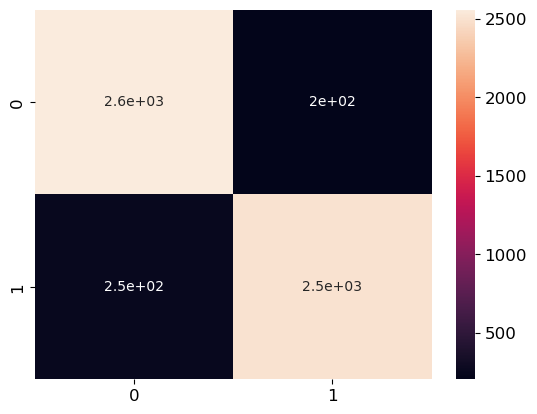

In [53]:
'CONFUSION MATRIX:'
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_transfer).ravel()
'TRUE POSITIVES | FALSE NEGATIVES'
'FALSE POSITIVES | TRUE NEGATIVES'
tp, fn
fp, tp


import matplotlib.pyplot as plt
conf = confusion_matrix(y_test, y_pred_transfer)
sns.heatmap(conf, annot=True)